In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
#reading the synthetic data
df = pd.read_csv('data/synthetic_data.csv')
df

In [5]:
temp_df = pd.DataFrame({'time': pd.to_datetime(df['time']),
                        'total_lots': df['total_lots'],
                        'lots_avail': df['lots_avail'],
                        'lots_taken': df['lots_taken']})

main_df = temp_df #df that we should be using (where time is not an index)
time_df = temp_df.set_index('time') # df where time is the index 

main_df.to_csv('main_df.csv') #csv folder for main_df
time_df.to_csv('time_df.csv')

In [ ]:
temp_frame = pd.read_csv('main_df.csv')
time_column = pd.to_datetime(temp_frame["time"])
time_column

In [ ]:
# if we want to filter out by the dates, we will have to use regex
#this function is then implemented in website.py
import re

def time_day_locater(day,start_time,end_time): # to find the time
    day = time_df.loc[day]
    time = day.between_time(start_time,end_time) # it uses the time df
    return time
def day_locater(day): # to find the day
    # it just uses a normal indexed df with time as one of the columns
    day = df.loc[df['time'].str.contains(day,flags = re.I,regex = True)]
    return day

time_df.loc['2022-03-10']

In [ ]:
#exploring the various plots we can exploit
# bar graph v1
import plotly.graph_objects as go
fig = go.Figure(
    data = [go.Bar(x = df['time'], y = df['lots_taken'])],
        layout_title_text = "test")
fig.show()

In [ ]:
# line graphs
import plotly.express as px
fig = px.line(df[:24],x = "time" , y = "lots_taken")
fig.add_trace(px.bar(df[:24], x = "time" , y = "lots_taken",color = "lots_taken",color_continuous_scale = "bluyl"))
fig.show()

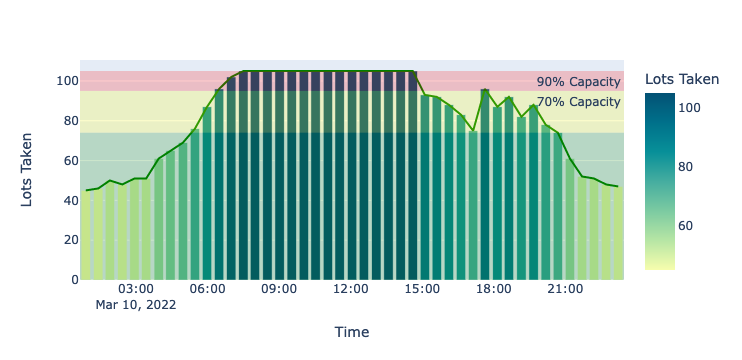

In [11]:
#function for the bar plot 
def bar_producer(day):
    fig = px.bar(day_locater(day), x ="time",
                 y = "lots_taken",
                 color = "lots_taken",
                 color_continuous_scale = "bluyl",
                labels = {"lots_taken": "Lots Taken",
                         "time": "Time" })
    fig.add_hrect(y0=0,y1 = 74, line_width = 0, fillcolor = "green", opacity = 0.2) # opacity levels
    fig.add_hrect(y0 = 74, y1 = 95 ,line_width = 0, fillcolor = "yellow", opacity = 0.2, annotation_text = "70% Capacity")
    fig.add_hrect(y0= 95,y1 = 105, line_width = 0, fillcolor = "red", opacity = 0.2,annotation_text = "90% Capacity")
    # opacity levels
    fig2 = px.line(day_locater(day),x = "time" , y = "lots_taken")
    fig2.update_traces(line_color = 'green') # color traces!
    fig.add_trace(fig2.data[0])
    return fig

fig = go.Figure(data= bar_producer('2022-03-10'))
fig.show()
# we will modify the text in dash

In [ ]:
figure1.show()

In [13]:
given_df = time_day_locater('2022-03-10' , '00:00:00', '02:00:00')
# filter that checks for the df
def final_filter(selected_df): 
    if len(selected_df.index) > 1:
        return selected_df.iloc[-1]
    elif len(selected_df.index) == 0:
        print("error, no values found within this time frame")
        # find a way to put this onto the html div
    
    else:
        return selected_df.iloc[0]

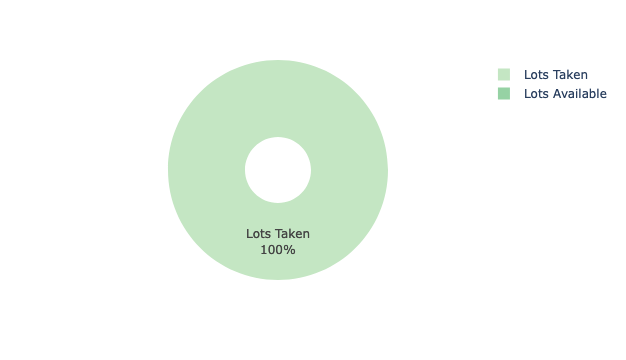

In [14]:
# pie producer wrapped into a function 
def pie_producer(day,start_time,end_time):
    given_df = time_day_locater(day,start_time,end_time) #function that filters specific val (on top)
    frame_converter = final_filter(given_df)[1:].to_list() #converts into the row that we are going to plot
    indv_df = pd.DataFrame({"test":frame_converter,"names": ["Lots Available", "Lots Taken"]}) # segments into a new df

    fig = px.pie(indv_df,values = "test", # real plotting
            names = "names",
            hole = .3,
            color_discrete_sequence = px.colors.sequential.Blugrn,
            hover_data = ['names'],)
    fig.update_traces(textposition = 'inside',textinfo = 'percent+label')
    return fig
    
a = go.Figure(data = pie_producer('2022-03-10' , '10:00:00', '11:00:00'))
a.show()

In [ ]:
# time list then we put it inside website.py
#copy paste the result into the script to save time 
def time_list():
    time_list = []
    a = pd.date_range(start = "2022-03-10", periods = 24, freq = "H")
    for time in a:
        time_list.append(time.strftime("%H:%M:%S"))
    return time_list

time_list()

In [15]:
df['time'] = pd.to_datetime(df['time'])